# Prototipo Time Series predecir Golstein
# Vectorizar CameoEvents

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

nltk.download('stopwords')
pd.set_option('display.max_columns', 100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#events = pd.read_csv("20240812.export.CSV", sep='\t')
events = pd.read_csv('20240812.export.CSV' ,sep='\t' ,dtype={'051': str})


In [ ]:
events.columns = [
    "GLOBALEVENTID", "SQLDATE", "MonthYear", "Year", "FractionDate",
    "Actor1Code", "Actor1Name", "Actor1CountryCode", "Actor1KnownGroupCode",
    "Actor1EthnicCode", "Actor1Religion1Code", "Actor1Religion2Code",
    "Actor1Type1Code", "Actor1Type2Code", "Actor1Type3Code", "Actor2Code",
    "Actor2Name", "Actor2CountryCode", "Actor2KnownGroupCode",
    "Actor2EthnicCode", "Actor2Religion1Code", "Actor2Religion2Code",
    "Actor2Type1Code", "Actor2Type2Code", "Actor2Type3Code", "IsRootEvent",
    "EventCode", "EventBaseCode", "EventRootCode", "QuadClass",
    "GoldsteinScale", "NumMentions", "NumSources", "NumArticles", "AvgTone",
    "Actor1Geo_Type", "Actor1Geo_FullName", "Actor1Geo_CountryCode",
    "Actor1Geo_ADM1Code", "Actor1Geo_Lat", "Actor1Geo_Long",
    "Actor1Geo_FeatureID", "Actor2Geo_Type", "Actor2Geo_FullName",
    "Actor2Geo_CountryCode", "Actor2Geo_ADM1Code", "Actor2Geo_Lat",
    "Actor2Geo_Long", "Actor2Geo_FeatureID", "ActionGeo_Type",
    "ActionGeo_FullName", "ActionGeo_CountryCode", "ActionGeo_ADM1Code",
    "ActionGeo_Lat", "ActionGeo_Long", "ActionGeo_FeatureID", "DATEADDED",
    "SOURCEURL"
]

In [ ]:
events.head(10)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1192141741,20230813,202308,2023,2023.6110,GBREDU,SCOTLAND,GBR,NaN,NaN,NaN,NaN,EDU,NaN,NaN,GBR,SCOTLAND,GBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,051,051,5,1,3.4,12,2,12,-0.600302,4,"Northern Ireland, Craigavon, United Kingdom",UK,UKR8,54.50000,-6.5000,-2604275,4,"Northern Ireland, Craigavon, United Kingdom",UK,UKR8,54.5000,-6.5000,-2604275,4,"Northern Ireland, Craigavon, United Kingdom",UK,UKR8,54.50000,-6.5000,-2604275,20240812,https://jerseyeveningpost.com/morenews/uknews/...
1,1192141742,20230813,202308,2023,2023.6110,GOV,MINISTRY,NaN,NaN,NaN,NaN,NaN,GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,012,012,1,1,-0.4,20,1,20,-3.638193,4,"Phuket, Phuket, Thailand",TH,TH62,7.83333,98.3833,-3253342,0,NaN,NaN,NaN,NaN,NaN,NaN,4,"Phuket, Phuket, Thailand",TH,TH62,7.83333,98.3833,-3253342,20240812,https://www.bangkokpost.com/thailand/general/2...
2,1192141743,20230813,202308,2023,2023.6110,NZLEDU,NEW ZEALAND,NZL,NaN,NaN,NaN,NaN,EDU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,020,020,2,1,3.0,10,1,10,2.937063,1,New Zealand,NZ,NZ,-42.00000,174.0000,NZ,0,NaN,NaN,NaN,NaN,NaN,NaN,1,New Zealand,NZ,NZ,-42.00000,174.0000,NZ,20240812,https://menafn.com/1108542423/Bilingualism-Und...
3,1192141744,20240713,202407,2024,2024.5288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,CALIFORNIA,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0311,031,3,1,5.2,5,1,5,-2.657343,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"California, United States",US,USCA,36.1700,-119.7460,CA,2,"California, United States",US,USCA,36.17000,-119.7460,CA,20240812,https://www.marinij.com/2024/08/11/opinion-cal...
4,1192141745,20240713,202407,2024,2024.5288,ISR,ISRAEL,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL,COMMANDER,NaN,NaN,NaN,NaN,NaN,MIL,NaN,NaN,0,138,138,13,3,-7.0,20,2,20,-4.795873,4,"Gaza, Israel (general), Israel",IS,IS00,31.41670,34.3333,-797156,4,"Gaza, Israel (general), Israel",IS,IS00,31.4167,34.3333,-797156,4,"Gaza, Israel (general), Israel",IS,IS00,31.41670,34.3333,-797156,20240812,https://www.livemint.com/news/world/israel-bol...
5,1192141746,20240713,202407,2024,2024.5288,MLIGOV,MALI,MLI,NaN,NaN,NaN,NaN,GOV,NaN,NaN,UAF,ARMED GROUP,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,060,060,6,2,6.0,1,1,1,-7.187500,4,"Hubballi, Karnataka, India",IN,IN19,15.35000,75.1667,-2097624,1,Mali,ML,ML,17.0000,-4.0000,ML,4,"Hubballi, Karnataka, India",IN,IN19,15.35000,75.1667,-2097624,20240812,https://timesofindia.indiatimes.com/city/hubba...
6,1192141747,20240713,202407,2024,2024.5288,MLIGOV,MALI,MLI,NaN,NaN,NaN,NaN,GOV,NaN,NaN,UAF,ARMED GROUP,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,060,060,6,2,6.0,6,1,6,-7.187500,1,Mali,ML,ML,17.00000,-4.0000,ML,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,50.4333,30.5167,-1044367,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,50.43330,30.5167,-1044367,20240812,https://timesofindia.indiatimes.com/city/hubba...
7,1192141748,20240713,202407,2024,2024.5288,MLIGOV,MALI,MLI,NaN,NaN,NaN,NaN,GOV,NaN,NaN,UAF,ARMED GROUP,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,060,060,6,2,6.0,1,1,1,-7.187500,1,Mali,ML,ML,17.00000,-4.0000,ML,1,Mali,ML,ML,17.0000,-4.0000,ML,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,50.43330,30.5167,-1044367,20240812,https://timesofindi

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116949 entries, 0 to 116948
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   GLOBALEVENTID          116949 non-null  int64  
 1   SQLDATE                116949 non-null  int64  
 2   MonthYear              116949 non-null  int64  
 3   Year                   116949 non-null  int64  
 4   FractionDate           116949 non-null  float64
 5   Actor1Code             105708 non-null  object 
 6   Actor1Name             105708 non-null  object 
 7   Actor1CountryCode      66087 non-null   object 
 8   Actor1KnownGroupCode   1149 non-null    object 
 9   Actor1EthnicCode       799 non-null     object 
 10  Actor1Religion1Code    1573 non-null    object 
 11  Actor1Religion2Code    345 non-null     object 
 12  Actor1Type1Code        50354 non-null   object 
 13  Actor1Type2Code        3347 non-null    object 
 14  Actor1Type3Code        89 non-null  

In [ ]:
events.describe()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,IsRootEvent,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED
count,1.169490e+05,1.169490e+05,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,102692.000000,102705.000000,116949.000000,81463.000000,81479.000000,116949.000000,113598.000000,113625.000000,116949.0
mean,1.192232e+09,2.024072e+07,202407.104678,2023.991124,2024.598514,0.608983,7.033921,1.848079,0.338445,11.736689,2.316540,11.381235,-2.300345,2.575764,30.607234,0.409804,2.042001,30.888344,3.313051,2.859443,30.552553,-0.605292,20240812.0
std,5.252044e+04,1.627693e+03,16.277754,0.162779,0.162678,0.487980,5.667433,1.150335,4.812408,53.854802,7.297934,50.409708,4.302571,1.525316,20.727600,77.005089,1.720340,20.265669,75.377764,1.331967,20.746517,77.327406,0.0
min,1.192142e+09,2.014082e+07,201408.000000,2014.000000,2014.616400,0.000000,1.000000,1.000000,-10.000000,1.000000,1.000000,1.000000,-23.333333,0.000000,-85.622100,-176.533000,0.000000,-85.622100,-176.533000,0.000000,-85.622100,-176.533000,20240812.0
25%,1.192186e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,0.000000,3.000000,1.000000,-2.000000,2.000000,1.000000,2.000000,-5.320388,1.000000,23.850000,-77.300000,0.000000,24.000000,-77.036400,2.000000,23.733300,-78.273800,20240812.0
50%,1.192233e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,-2.355449,3.000000,35.000000,10.000000,2.000000,35.000000,17.000000,3.000000,35.000000,8.516670,20240812.0
75%,1.192278e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,1.000000,11.000000,3.000000,3.400000,10.000000,1.000000,10.000000,0.716612,4.000000,43.038900,51.250000,4.000000,43.077400,50.583100,4.000000,42.833400,50.150000,20240812.0
max,1.192319e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,1.000000,20.000000,4.000000,10.000000,3897.000000,230.000000,3130.000000,28.571429,5.000000,82.950000,179.041000,5.000000,82.950000,178.833000,5.000000,82.950000,179.041000,20240812.0


In [ ]:
# variables relevantes
features = ['GLOBALEVENTID', 'Actor1Name','Actor1CountryCode', 'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
                   'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles',
                   'AvgTone', 'IsRootEvent', 'Actor1Geo_Lat', 'Actor1Geo_Long',
                   'Actor2Geo_Lat', 'Actor2Geo_Long', 'ActionGeo_Lat', 'ActionGeo_Long',
                   'SQLDATE', 'MonthYear']

In [ ]:
events_2 = events[features]

In [ ]:
def calculate_null_percentages(df):
    return df.isnull().mean() * 100

In [ ]:
# % nulos
calculate_null_percentages(events_2)

,0
GLOBALEVENTID,0.000000
Actor1Name,9.611882
Actor1CountryCode,43.490752
EventCode,0.000000
EventBaseCode,0.000000
EventRootCode,0.000000
QuadClass,0.000000
GoldsteinScale,0.000000
NumMentions,0.000000
NumSources,0.000000


In [ ]:
events_2.shape

(116949, 21)

In [ ]:
events_2.dropna(inplace=True)

<ipython-input-12-1c4436f20ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2.dropna(inplace=True)


In [ ]:
events_2.shape

(47216, 21)

In [ ]:
events_2.isna().sum()

,0
GLOBALEVENTID,0
Actor1Name,0
Actor1CountryCode,0
EventCode,0
EventBaseCode,0
EventRootCode,0
QuadClass,0
GoldsteinScale,0
NumMentions,0
NumSources,0


In [ ]:
events_2 = events_2.reset_index(drop=True)

In [56]:
events_2.head()

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear,Event,day,week,month,year,day_of_week,GoldsteinScale_lag1,GoldsteinScale_lag7,GoldsteinScale_lag30,AvgTone_lag1,NumMentions_lag1,GoldsteinScale_roll7,AvgTone_roll7,NumMentions_roll7
30,1192141922,QUEENSLAND,AUS,060,060,6,2,6.0,10,1,10,-8.401977,0,-27.5000,153.017,-27.5000,153.017,-27.5000,153.017,2024-08-12,2024-08-01,engage in material cooperation not specified b...,12,33,8,2024,0,0.0,-0.4,3.4,-8.401977,10.0,1.114286,-6.917043,82.285714
31,1192141923,MELBOURNE,AUS,0841,084,8,2,7.0,2,1,2,-4.983389,1,-37.8167,144.967,-37.8167,144.967,-37.8167,144.967,2024-08-12,2024-08-01,return release persons,12,33,8,2024,0,6.0,2.8,-7.0,-8.401977,10.0,1.714286,-6.346609,80.571429
32,1192141924,SYDNEY,AUS,141,141,14,3,-6.5,8,1,8,-8.401977,0,-33.8833,151.217,-33.8833,151.217,-33.8833,151.217,2024-08-12,2024-08-01,demonstrate or rally,12,33,8,2024,0,7.0,-10.0,6.0,-4.983389,2.0,2.214286,-6.264546,77.428571
33,1192141927,AUSTRALIAN,AUS,036,036,3,1,4.0,27,6,27,0.000000,0,-25.0000,135.000,-25.0000,135.000,-25.0000,135.000,2024-08-12,2024-08-01,express intent to meet or negotiate,12,33,8,2024,0,-6.5,3.4,6.0,-8.401977,8.0,2.300000,-4.982200,77.000000
34,1192141928,VICTORIA,AUS,046,046,4,1,7.0,3,1,3,-4.350078,0,-41.3000,174.783,-41.3000,174.783,-41.3000,174.783,2024-08-12,2024-08-01,engage in negotiation,12,33,8,2024,0,4.0,2.8,6.0,0.000000,27.0,2.900000,-5.268919,60.142857


In [ ]:
# corregir formato fecha

events_2['SQLDATE'] = pd.to_datetime(events_2['SQLDATE'], format='%Y%m%d')
events_2['MonthYear'] = pd.to_datetime(events_2['MonthYear'], format='%Y%m', errors='coerce')

In [ ]:
event_codes = {
    "01": "MAKE PUBLIC STATEMENT",
    "010": "Make statement, not specified below",
    "011": "Decline comment",
    "012": "Make pessimistic comment",
    "013": "Make optimistic comment",
    "014": "Consider policy option",
    "015": "Acknowledge or claim responsibility",
    "016": "Deny responsibility",
    "017": "Engage in symbolic act",
    "018": "Make empathetic comment",
    "019": "Express accord",
    "02": "APPEAL",
    "020": "Appeal, not specified below",
    "021": "Appeal for material cooperation, not specified below",
    "0211": "Appeal for economic cooperation",
    "0212": "Appeal for military cooperation",
    "0213": "Appeal for judicial cooperation",
    "0214": "Appeal for intelligence",
    "022": "Appeal for diplomatic cooperation, such as policy support",
    "023": "Appeal for aid, not specified below",
    "0231": "Appeal for economic aid",
    "0232": "Appeal for military aid",
    "0233": "Appeal for humanitarian aid",
    "0234": "Appeal for military protection or peacekeeping",
    "024": "Appeal for political reform, not specified below",
    "0241": "Appeal for change in leadership",
    "0242": "Appeal for policy change",
    "0243": "Appeal for rights",
    "0244": "Appeal for change in institutions, regime",
    "025": "Appeal to yield",
    "0251": "Appeal for easing of administrative sanctions",
    "0252": "Appeal for easing of popular dissent",
    "0253": "Appeal for release of persons or property",
    "0254": "Appeal for easing of economic sanctions, boycott, or embargo",
    "0255": "Appeal for target to allow international involvement (non-mediation)",
    "0256": "Appeal for de-escalation of military engagement",
    "026": "Appeal to others to meet or negotiate",
    "027": "Appeal to others to settle dispute",
    "028": "Appeal to others to engage in or accept mediation",
    "03": "EXPRESS INTENT TO COOPERATE",
    "030": "Express intent to cooperate, not specified below",
    "031": "Express intent to engage in material cooperation, not specified below",
    "0311": "Express intent to cooperate economically",
    "0312": "Express intent to cooperate militarily",
    "0313": "Express intent to cooperate on judicial matters",
    "0314": "Express intent to cooperate on intelligence",
    "032": "Express intent to provide diplomatic cooperation such as policy support",
    "033": "Express intent to provide material aid, not specified below",
    "0331": "Express intent to provide economic aid",
    "0332": "Express intent to provide military aid",
    "0333": "Express intent to provide humanitarian aid",
    "0334": "Express intent to provide military protection or peacekeeping",
    "034": "Express intent to institute political reform, not specified below",
    "0341": "Express intent to change leadership",
    "0342": "Express intent to change policy",
    "0343": "Express intent to provide rights",
    "0344": "Express intent to change institutions, regime",
    "035": "Express intent to yield, not specified below",
    "0351": "Express intent to ease administrative sanctions",
    "0352": "Express intent to ease popular dissent",
    "0353": "Express intent to release persons or property",
    "0354": "Express intent to ease economic sanctions, boycott, or embargo",
    "0355": "Express intent allow international involvement (not mediation)",
    "0356": "Express intent to de-escalate military engagement",
    "036": "Express intent to meet or negotiate",
    "037": "Express intent to settle dispute",
    "038": "Express intent to accept mediation",
    "039": "Express intent to mediate",
    "04": "CONSULT",
    "040": "Consult, not specified below",
    "041": "Discuss by telephone",
    "042": "Make a visit",
    "043": "Host a visit",
    "044": "Meet at a third location",
    "045": "Mediate",
    "046": "Engage in negotiation",
    "05": "ENGAGE IN DIPLOMATIC COOPERATION",
    "050": "Engage in diplomatic cooperation, not specified below",
    "051": "Praise or endorse",
    "052": "Defend verbally",
    "053": "Rally support on behalf of",
    "054": "Grant diplomatic recognition",
    "055": "Apologize",
    "056": "Forgive",
    "057": "Sign formal agreement",
    "06": "ENGAGE IN MATERIAL COOPERATION",
    "060": "Engage in material cooperation, not specified below",
    "061": "Cooperate economically",
    "062": "Cooperate militarily",
    "063": "Engage in judicial cooperation",
    "064": "Share intelligence or information",
    "07": "PROVIDE AID",
    "070": "Provide aid, not specified below",
    "071": "Provide economic aid",
    "072": "Provide military aid",
    "073": "Provide humanitarian aid",
    "074": "Provide military protection or peacekeeping",
    "075": "Grant asylum",
    "08": "YIELD",
    "080": "Yield, not specified below",
    "081": "Ease administrative sanctions, not specified below",
    "0811": "Ease restrictions on political freedoms",
    "0812": "Ease ban on political parties or politicians",
    "0813": "Ease curfew",
    "0814": "Ease state of emergency or martial law",
    "082": "Ease political dissent",
    "083": "Accede to requests or demands for political reform not specified below",
    "0831": "Accede to demands for change in leadership",
    "0832": "Accede to demands for change in policy",
    "0833": "Accede to demands for rights",
    "0834": "Accede to demands for change in institutions, regime",
    "084": "Return, release, not specified below",
    "0841": "Return, release person(s)",
    "0842": "Return, release property",
    "085": "Ease economic sanctions, boycott, embargo",
    "086": "Allow international involvement not specified below",
    "0861": "Receive deployment of peacekeepers",
    "0862": "Receive inspectors",
    "0863": "Allow delivery of humanitarian aid",
    "087": "De-escalate military engagement",
    "0871": "Declare truce, ceasefire",
    "0872": "Ease military blockade",
    "0873": "Demobilize armed forces",
    "0874": "Retreat or surrender militarily",
    "09": "INVESTIGATE",
    "090": "Investigate, not specified below",
    "091": "Investigate crime, corruption",
    "092": "Investigate human rights abuses",
    "093": "Investigate military action",
    "094": "Investigate war crimes",
    "10": "DEMAND",
    "100": "Demand, not specified below",
    "101": "Demand information, investigation",
    "1011": "Demand economic cooperation",
    "1012": "Demand military cooperation",
    "1013": "Demand judicial cooperation",
    "1014": "Demand intelligence cooperation",
    "102": "Demand policy support",
    "103": "Demand aid, protection, or peacekeeping",
    "1031": "Demand economic aid",
    "1032": "Demand military aid",
    "1033": "Demand humanitarian aid",
    "1034": "Demand military protection or peacekeeping",
    "104": "Demand political reform, not specified below",
    "1041": "Demand change in leadership",
    "1042": "Demand policy change",
    "1043": "Demand rights",
    "1044": "Demand change in institutions, regime",
    "105": "Demand mediation",
    "1051": "Demand easing of administrative sanctions",
    "1052": "Demand easing of political dissent",
    "1053": "Demand release of persons or property",
    "1054": "Demand easing of economic sanctions, boycott, or embargo",
    "1055": "Demand that target allows international involvement (non-mediation)",
    "1056": "Demand de-escalation of military engagement",
    "106": "Demand withdrawal",
    "107": "Demand ceasefire",
    "108": "Demand meeting, negotiation",
    "11": "DISAPPROVE",
    "110": "Disapprove, not specified below",
    "111": "Criticize or denounce",
    "112": "Accuse, not specified below",
    "1121": "Accuse of crime, corruption",
    "1122": "Accuse of human rights abuses",
    "1123": "Accuse of aggression",
    "1124": "Accuse of war crimes",
    "1125": "Accuse of espionage, treason",
    "113": "Rally opposition against",
    "114": "Complain officially",
    "115": "Bring lawsuit against",
    "116": "Find guilty or liable (legally)",
    "12": "REJECT",
    "120": "Reject, not specified below",
    "121": "Reject material cooperation",
    "1211": "Reject economic cooperation",
    "1212": "Reject military cooperation",
    "122": "Reject request or demand for material aid, not specified below",
    "1221": "Reject request for economic aid",
    "1222": "Reject request for military aid",
    "1223": "Reject request for humanitarian aid",
    "1224": "Reject request for military protection or peacekeeping",
    "123": "Reject request or demand for political reform, not specified below",
    "1231": "Reject request for change in leadership",
    "1232": "Reject request for policy change",
    "1233": "Reject request for rights",
    "1234": "Reject request for change in institutions, regime",
    "124": "Refuse to yield, not specified below",
    "1241": "Refuse to ease administrative sanctions",
    "1242": "Refuse to ease popular dissent",
    "1243": "Refuse to release persons or property",
    "1244": "Refuse to ease economic sanctions, boycott, or embargo",
    "1245": "Refuse to allow international involvement (non-mediation)",
    "1246": "Refuse to de-escalate military engagement",
    "125": "Reject proposal to meet, discuss, or negotiate",
    "126": "Reject mediation",
    "127": "Reject plan, agreement to settle dispute",
    "128": "Defy norms, law",
    "129": "Veto",
    "13": "THREATEN",
    "130": "Threaten, not specified below",
    "131": "Threaten non-force, not specified below",
    "1311": "Threaten to reduce or stop aid",
    "1312": "Threaten to boycott, embargo, or sanction",
    "1313": "Threaten to reduce or break relations",
    "132": "Threaten with administrative sanctions, not specified below",
    "1321": "Threaten to impose restrictions on political freedoms",
    "1322": "Threaten to ban political parties or politicians",
    "1323": "Threaten to impose curfew",
    "1324": "Threaten to impose state of emergency or martial law",
    "133": "Threaten political dissent, protest",
    "134": "Threaten to halt negotiations",
    "135": "Threaten to halt mediation",
    "136": "Threaten to halt international involvement (non-mediation)",
    "137": "Threaten with violent repression",
    "138": "Threaten to use military force, not specified below",
    "1381": "Threaten blockade",
    "1382": "Threaten occupation",
    "1383": "Threaten unconventional violence",
    "1384": "Threaten conventional attack",
    "1385": "Threaten attack with WMD",
    "139": "Give ultimatum",
    "14": "PROTEST",
    "140": "Engage in political dissent, not specified below",
    "141": "Demonstrate or rally",
    "1411": "Demonstrate for leadership change",
    "1412": "Demonstrate for policy change",
    "1413": "Demonstrate for rights",
    "1414": "Demonstrate for change in institutions, regime",
    "142": "Conduct hunger strike, not specified below",
    "1421": "Conduct hunger strike for leadership change",
    "1422": "Conduct hunger strike for policy change",
    "1423": "Conduct hunger strike for rights",
    "1424": "Conduct hunger strike for change in institutions, regime",
    "143": "Conduct strike or boycott, not specified below",
    "1431": "Conduct strike or boycott for leadership change",
    "1432": "Conduct strike or boycott for policy change",
    "1433": "Conduct strike or boycott for rights",
    "1434": "Conduct strike or boycott for change in institutions, regime",
    "144": "Obstruct passage, block",
    "1441": "Obstruct passage to demand leadership change",
    "1442": "Obstruct passage to demand policy change",
    "1443": "Obstruct passage to demand rights",
    "1444": "Obstruct passage to demand change in institutions, regime",
    "145": "Protest violently, riot",
    "1451": "Engage in violent protest for leadership change",
    "1452": "Engage in violent protest for policy change",
    "1453": "Engage in violent protest for rights",
    "1454": "Engage in violent protest for change in institutions, regime",
    "15": "EXHIBIT FORCE POSTURE",
    "150": "Demonstrate military or police power, not specified below",
    "151": "Increase police alert status",
    "152": "Increase military alert status",
    "153": "Mobilize or increase police power",
    "154": "Mobilize or increase armed forces",
    "16": "REDUCE RELATIONS",
    "160": "Reduce relations, not specified below",
    "161": "Reduce or break diplomatic relations",
    "162": "Reduce or stop aid, not specified below",
    "1621": "Reduce or stop economic assistance",
    "1622": "Reduce or stop military assistance",
    "1623": "Reduce or stop humanitarian assistance",
    "163": "Impose embargo, boycott, or sanctions",
    "164": "Halt negotiations",
    "165": "Halt mediation",
    "166": "Expel or withdraw, not specified below",
    "1661": "Expel or withdraw peacekeepers",
    "1662": "Expel or withdraw inspectors, observers",
    "1663": "Expel or withdraw aid agencies",
    "17": "COERCE",
    "170": "Coerce, not specified below",
    "171": "Seize or damage property, not specified below",
    "1711": "Confiscate property",
    "1712": "Destroy property",
    "172": "Impose administrative sanctions, not specified below",
    "1721": "Impose restrictions on political freedoms",
    "1722": "Ban political parties or politicians",
    "1723": "Impose curfew",
    "1724": "Impose state of emergency or martial law",
    "173": "Arrest, detain, or charge with legal action",
    "174": "Expel or deport individuals",
    "175": "Use tactics of violent repression",
    "18": "ASSAULT",
    "180": "Use unconventional violence, not specified below",
    "181": "Abduct, hijack, or take hostage",
    "182": "Physically assault, not specified below",
    "1821": "Sexually assault",
    "1822": "Torture",
    "1823": "Kill by physical assault",
    "183": "Conduct suicide, car, or other non-military bombing, not specified below",
    "1831": "Carry out suicide bombing",
    "1832": "Carry out car bombing",
    "1833": "Carry out roadside bombing",
    "184": "Use as human shield",
    "185": "Attempt to assassinate",
    "186": "Assassinate",
    "19": "FIGHT",
    "190": "Use conventional military force, not specified below",
    "191": "Impose blockade, restrict movement",
    "192": "Occupy territory",
    "193": "Fight with small arms and light weapons",
    "194": "Fight with artillery and tanks",
    "195": "Employ aerial weapons",
    "196": "Violate ceasefire",
    "200": "Use unconventional mass violence, not specified below",
    "201": "Engage in mass expulsion",
    "202": "Engage in mass killings",
    "203": "Engage in ethnic cleansing",
    "204": "Use weapons of mass destruction, not specified below",
    "2041": "Use chemical, biological, or radiological weapons",
    "2042": "Detonate nuclear weapons"
}

In [ ]:
len(event_codes)

310

In [ ]:
# crear columna con eventos a partir de EventCode
events_2['Event'] = events_2['EventCode'].map(event_codes)

In [ ]:
len(events_2["Event"].unique())

185

In [ ]:
events_2.head(3)

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear,Event
0,1192141741,SCOTLAND,GBR,051,051,5,1,3.4,12,2,12,-0.600302,0,54.5000,-6.5000,54.5000,-6.5000,54.5000,-6.5000,2023-08-13,2023-08-01,Praise or endorse
1,1192141745,ISRAEL,ISR,138,138,13,3,-7.0,20,2,20,-4.795873,0,31.4167,34.3333,31.4167,34.3333,31.4167,34.3333,2024-07-13,2024-07-01,"Threaten to use military force, not specified ..."
2,1192141746,MALI,MLI,060,060,6,2,6.0,1,1,1,-7.187500,0,15.3500,75.1667,17.0000,-4.0000,15.3500,75.1667,2024-07-13,2024-07-01,"Engage in material cooperation, not specified ..."


# Vectorizar y lemmatizar texto

In [ ]:
# Función para normalizar y limpiar un texto
def clean_text(text):
    text = text.lower()

    ## Eliminar caracteres especiales usando regex
    text = re.sub(r'[^a-z\s]', '', text)

    ## Eliminar espacios en blanco adicionales
    text = ' '.join(text.split())

    return text

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# texto a palabra base
def lemmatize(text):

    doc = nlp(text.lower())

    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [ ]:
# normalizar texto
events_2["Event"] = events_2["Event"].apply(clean_text)

In [ ]:
# lemmatize


In [ ]:
%%time
#vectorizar
max_features = 50000  # Ajusta según tus necesidades

# Crear el vectorizador TF-IDF
tf_idf = TfidfVectorizer(stop_words="english", lowercase=True, max_features=max_features)

# Vectorizar la columna "Event"
X = tf_idf.fit_transform(events_2["Event"])

# Convertir el resultado a un DataFrame para facilitar la visualización (opcional)
tfidf_df = pd.DataFrame(X.toarray(), columns=tf_idf.get_feature_names_out())

# Imprimir las primeras filas del DataFrame de TF-IDF
tfidf_df

CPU times: user 473 ms, sys: 214 ms, total: 687 ms
Wall time: 1.06 s


,abduct,abuses,accede,accept,accord,accuse,acknowledge,act,action,administrative,aerial,aggression,agreement,aid,alert,allow,apologize,appeal,armed,arms,arrest,artillery,assassinate,assault,asylum,attack,attempt,ban,behalf,block,blockade,bombing,boycott,break,bring,car,carry,ceasefire,change,charge,claim,cleansing,coerce,comment,complain,conduct,confiscate,consider,consult,conventional,...,repression,request,requests,responsibility,restrict,restrictions,retreat,return,rights,riot,sanction,sanctions,seize,settle,sexually,share,shield,sign,small,specified,state,statement,status,stop,strike,suicide,support,surrender,symbolic,tactics,tanks,telephone,territory,threaten,torture,truce,ultimatum,unconventional,use,verbally,veto,violence,violent,violently,visit,war,weapons,withdraw,withdrawal,yield
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.591559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
events_2["Event"]

,Event
0,praise or endorse
1,threaten to use military force not specified b...
2,engage in material cooperation not specified b...
3,engage in material cooperation not specified b...
4,engage in material cooperation not specified b...
...,...
47211,appeal for diplomatic cooperation such as poli...
47212,consult not specified below
47213,consult not specified below
47214,express intent to meet or negotiate


<Axes: xlabel='Actor1CountryCode'>

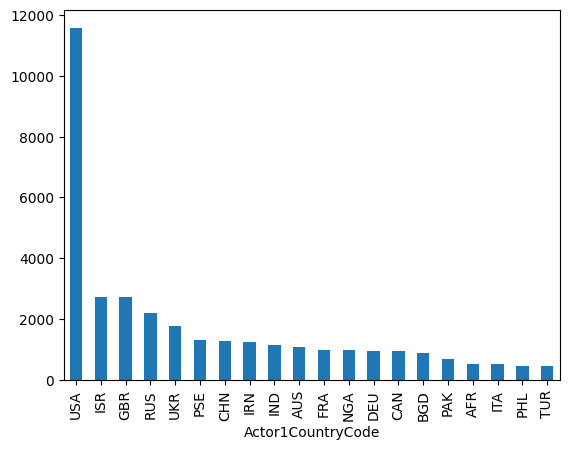

In [ ]:
events_2["Actor1CountryCode"].value_counts().head(20).plot(kind='bar')

In [ ]:
#grouped = events_2.groupby(['Actor1CountryCode', 'SQLDATE'])

#Paso 2: Calcular el promedio ponderado de GoldsteinScale
#Usamos NumArticles como el peso para el cálculo del promedio ponderado
#def weighted_average(df, value_column, weight_column):
#    return (df[value_column] * df[weight_column]).sum() / df[weight_column].sum()

#events_2['WeightedGoldstein'] = grouped.apply(lambda x: weighted_average(x, 'GoldsteinScale', 'NumArticles')).reset_index(level=[0,1], drop=True)

#Paso 3: Crear el "Inestability Index" como el promedio ponderado
#inestability_index = grouped['WeightedGoldstein'].mean().reset_index()

#Renombrar la columna para el índice final
#inestability_index.columns = ['Country', 'Date', 'InestabilityIndex']

#print(inestability_index)


In [ ]:
#inestability_index.orderby("Country")
filtered_df = events_2.query("Actor1CountryCode == 'AFG' & SQLDATE == '2024-08-05'")

filtered_df

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear,Event
22669,1192232082,TALIBAN,AFG,040,040,4,1,1.0,2,1,2,-3.924222,0,38.8951,-77.0364,38.8951,-77.0364,38.8951,-77.0364,2024-08-05,2024-08-01,consult not specified below


In [ ]:
events_2.head()

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear,Event
0,1192141741,SCOTLAND,GBR,051,051,5,1,3.4,12,2,12,-0.600302,0,54.5000,-6.5000,54.5000,-6.5000,54.5000,-6.5000,2023-08-13,2023-08-01,praise or endorse
1,1192141745,ISRAEL,ISR,138,138,13,3,-7.0,20,2,20,-4.795873,0,31.4167,34.3333,31.4167,34.3333,31.4167,34.3333,2024-07-13,2024-07-01,threaten to use military force not specified b...
2,1192141746,MALI,MLI,060,060,6,2,6.0,1,1,1,-7.187500,0,15.3500,75.1667,17.0000,-4.0000,15.3500,75.1667,2024-07-13,2024-07-01,engage in material cooperation not specified b...
3,1192141747,MALI,MLI,060,060,6,2,6.0,6,1,6,-7.187500,0,17.0000,-4.0000,50.4333,30.5167,50.4333,30.5167,2024-07-13,2024-07-01,engage in material cooperation not specified b...
4,1192141748,MALI,MLI,060,060,6,2,6.0,1,1,1,-7.187500,0,17.0000,-4.0000,17.0000,-4.0000,50.4333,30.5167,2024-07-13,2024-07-01,engage in material cooperation not specified b...


# EDA

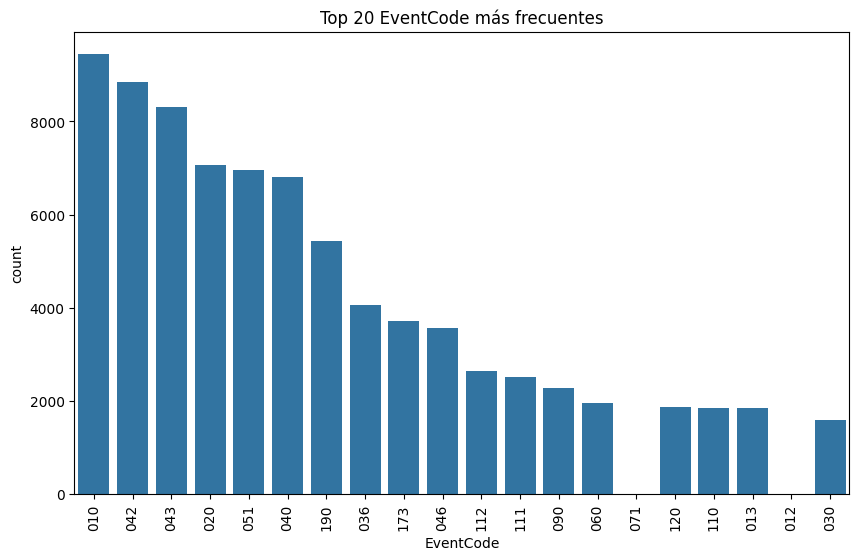

In [ ]:
top_event_codes = events_2['EventCode'].value_counts().nlargest(20).index

plt.figure(figsize=(10, 6))
sns.countplot(x='EventCode', data=events[events['EventCode'].isin(top_event_codes)],
              order=events['EventCode'].value_counts().nlargest(20).index)
plt.title('Top 20 EventCode más frecuentes')
plt.xticks(rotation=90)
plt.show()

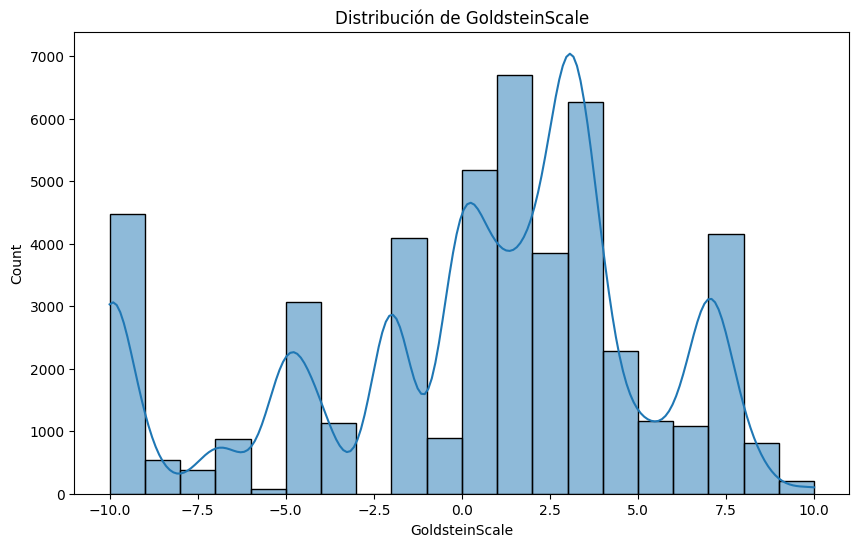

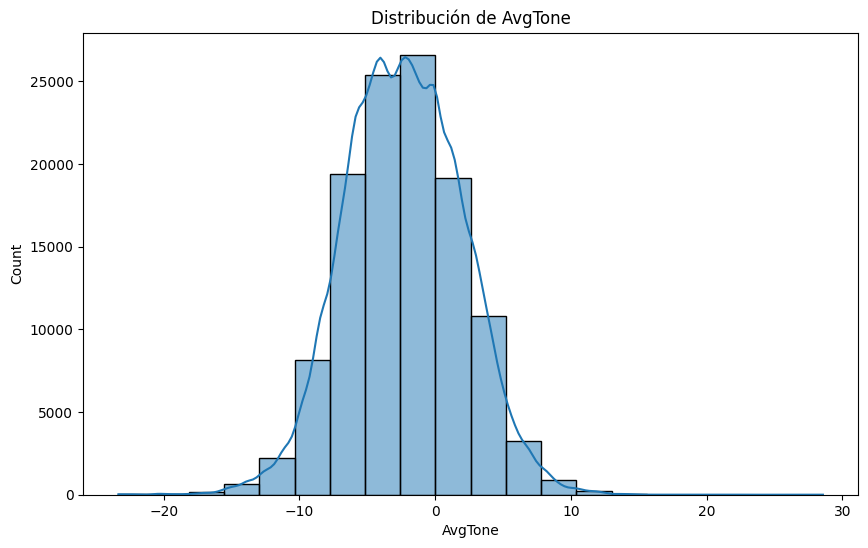

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(events_2['GoldsteinScale'], bins=20, kde=True)
plt.title('Distribución de GoldsteinScale')
plt.show()

# Distribución de AvgTone
plt.figure(figsize=(10, 6))
sns.histplot(events['AvgTone'], bins=20, kde=True)
plt.title('Distribución de AvgTone')
plt.show()


In [ ]:
events_2.pivot_table(index="Actor1CountryCode", values="GoldsteinScale", aggfunc="mean").sort_values(by="GoldsteinScale", ascending=False).head(20)

,GoldsteinScale
Actor1CountryCode,
ERI,10.000000
AND,7.000000
BWA,5.266667
MAC,4.600000
BMU,4.551852
PLW,4.529412
SLB,4.421739
GTM,4.300000
FSM,4.222222


In [ ]:
events_2.query("Actor1CountryCode == 'ERI'")

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear,Event
3193,1192153606,ERITREAN,ERI,0874,087,8,2,10.0,14,14,14,-5.288313,0,15.0,39.0,13.5,39.5,11.1667,39.1667,2024-08-12,2024-08-01,retreat or surrender militarily
3194,1192153607,ERITREAN,ERI,0874,087,8,2,10.0,14,14,14,-5.288313,0,15.0,39.0,13.5,39.5,13.5000,39.5000,2024-08-12,2024-08-01,retreat or surrender militarily


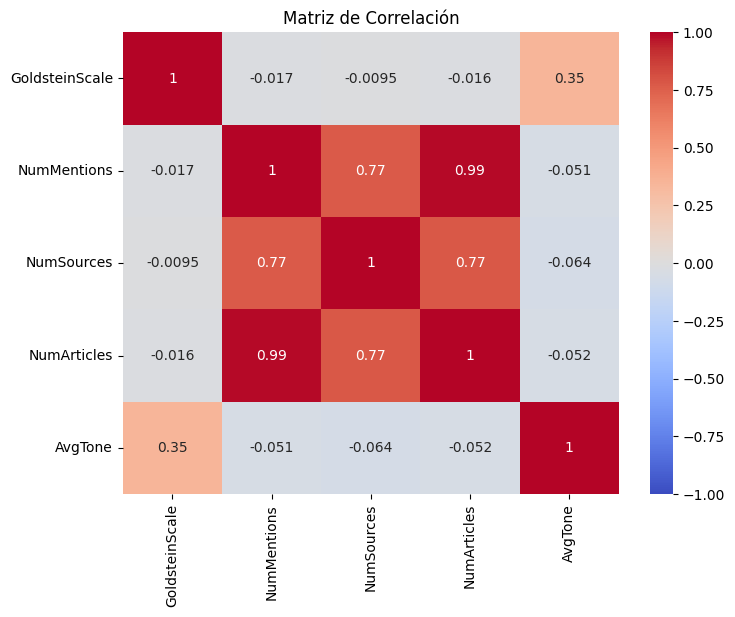

In [ ]:
# correlaciones
subset_events = events_2[['GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone']]

corr_matrix = subset_events.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

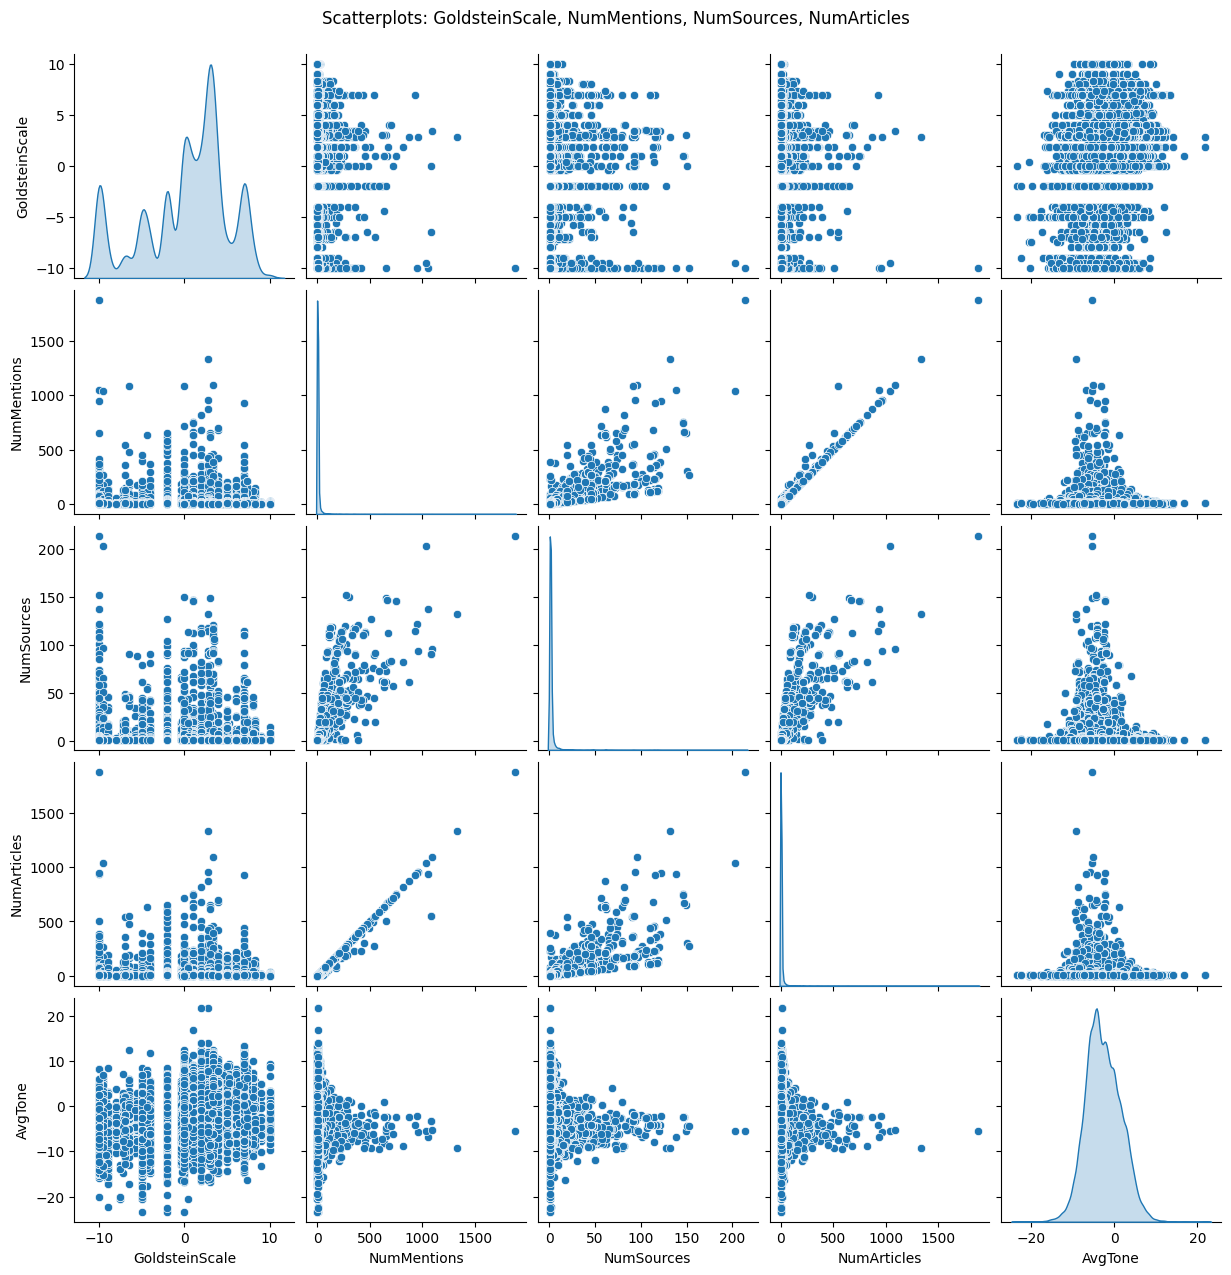

In [ ]:
sns.pairplot(subset_events, kind='scatter', diag_kind='kde')
plt.suptitle('Scatterplots: GoldsteinScale, NumMentions, NumSources, NumArticles', y=1.02)
plt.show()

In [ ]:
# crear variables temporales
events_2['SQLDATE'] = pd.to_datetime(events_2['SQLDATE'])
events_2['day'] = events_2['SQLDATE'].dt.day
events_2['week'] = events_2['SQLDATE'].dt.isocalendar().week
events_2['month'] = events_2['SQLDATE'].dt.month
events_2['year'] = events_2['SQLDATE'].dt.year
events_2['day_of_week'] = events_2['SQLDATE'].dt.dayofweek

In [ ]:
# features lag
events_2['GoldsteinScale_lag1'] = events_2['GoldsteinScale'].shift(1)
events_2['GoldsteinScale_lag7'] = events_2['GoldsteinScale'].shift(7)
events_2['GoldsteinScale_lag30'] = events_2['GoldsteinScale'].shift(30)
events_2['AvgTone_lag1'] = events_2['AvgTone'].shift(1)
events_2['NumMentions_lag1'] = events_2['NumMentions'].shift(1)

In [ ]:
# features ventanas móvil
events_2['GoldsteinScale_roll7'] = events_2['GoldsteinScale'].rolling(window=7).mean()
events_2['AvgTone_roll7'] = events_2['AvgTone'].rolling(window=7).mean()
events_2['NumMentions_roll7'] = events_2['NumMentions'].rolling(window=7).mean()

In [ ]:
events_2.dropna(inplace=True)

In [ ]:
X = events_2[['day', 'week', 'month', 'year', 'day_of_week', 'GoldsteinScale_lag1',
              'GoldsteinScale_lag7', 'AvgTone_lag1', 'NumMentions_lag1',
              'GoldsteinScale_roll7', 'AvgTone_roll7', 'NumMentions_roll7',
              'QuadClass', 'EventCode']]
y = events_2['GoldsteinScale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

time_model = RandomForestRegressor(n_estimators=100, random_state=42)
time_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = time_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.365374019919523e-05
